In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

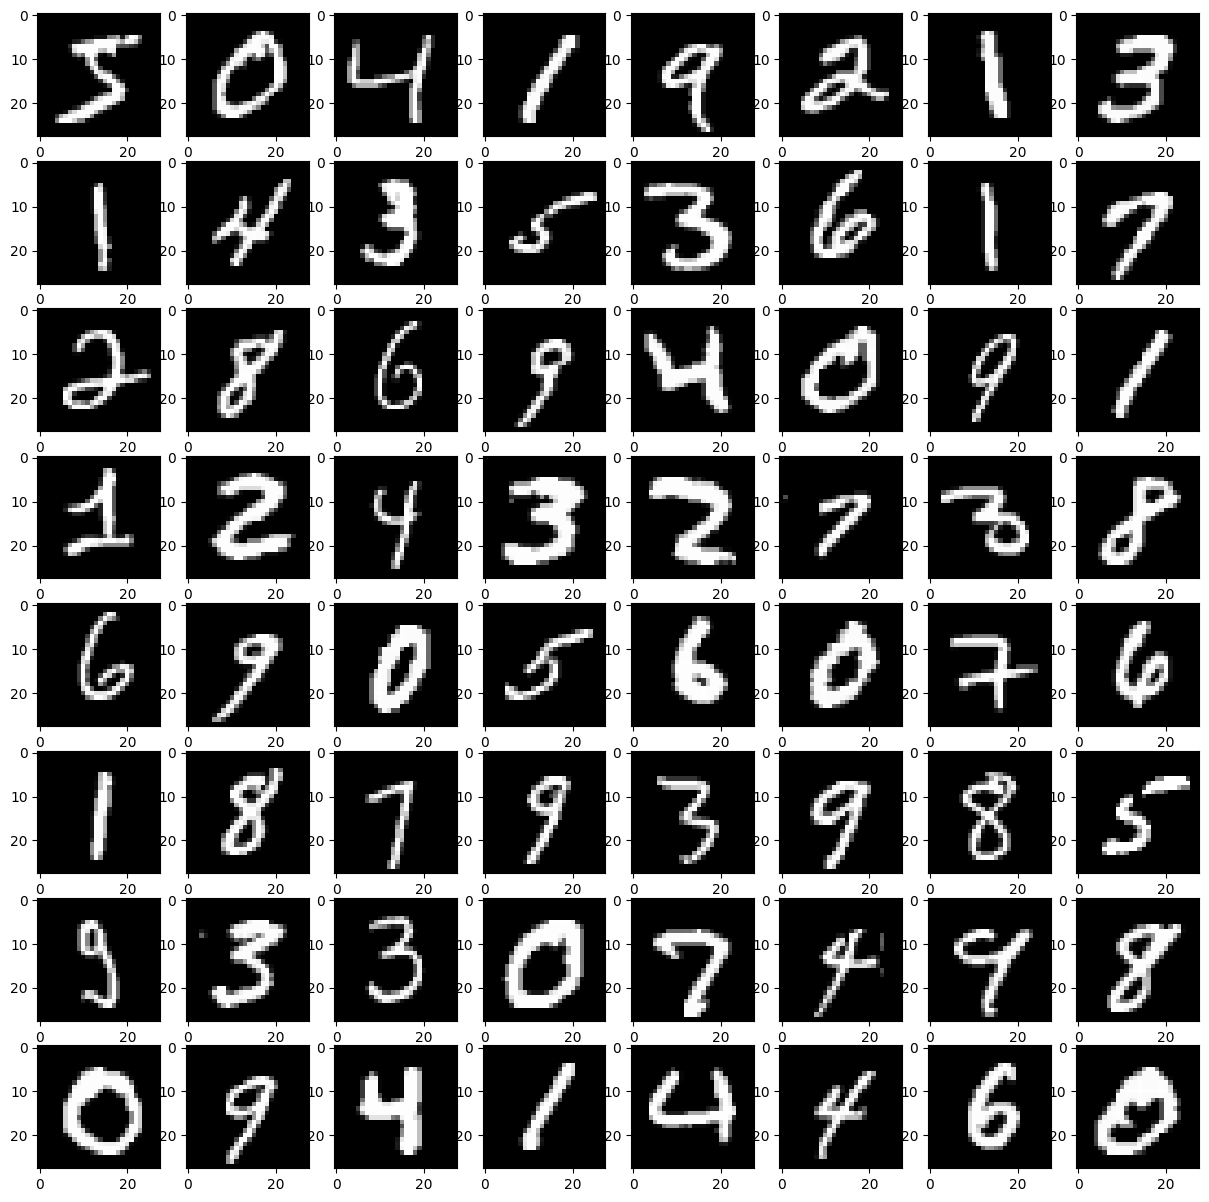

In [6]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(15,15))
a=0

for i in range(8):
    for j in range(8):
        axes[i,j].imshow(X_train_full[a], cmap='gray')
        a += 1
plt.show()

#### Data normalization

In [7]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [8]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
class_names[y_train[8]]

'9'

In [10]:
print(y_train[8])

9


#### Model 1 with early stopping

In [11]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=4, activation='tanh', kernel_size=(3,3), input_shape=(28,28,1), batch_size=32),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])  

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 26, 26, 4)           40        
                                                                 
 max_pooling2d (MaxPooling2  (32, 13, 13, 4)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (32, 676)                 0         
                                                                 
 dense (Dense)               (32, 300)                 203100    
                                                                 
 batch_normalization (Batch  (32, 300)                 1200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (32, 100)                 3

In [13]:
model_1.layers

In [14]:
model_1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='sgd', 
    metrics='accuracy'
)

#### Early stopping

In [15]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5)

In [16]:
history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=early_stopping)

Epoch 1/30


1719/1719 [==============================] - 14s 7ms/step - loss: 0.2850 - accuracy: 0.9167 - val_loss: 0.1333 - val_accuracy: 0.9608
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1501 - accuracy: 0.9570 - val_loss: 0.1044 - val_accuracy: 0.9704
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1146 - accuracy: 0.9661 - val_loss: 0.0913 - val_accuracy: 0.9732
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0942 - accuracy: 0.9725 - val_loss: 0.0830 - val_accuracy: 0.9736
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0807 - accuracy: 0.9761 - val_loss: 0.0682 - val_accuracy: 0.9806
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0622 - val_

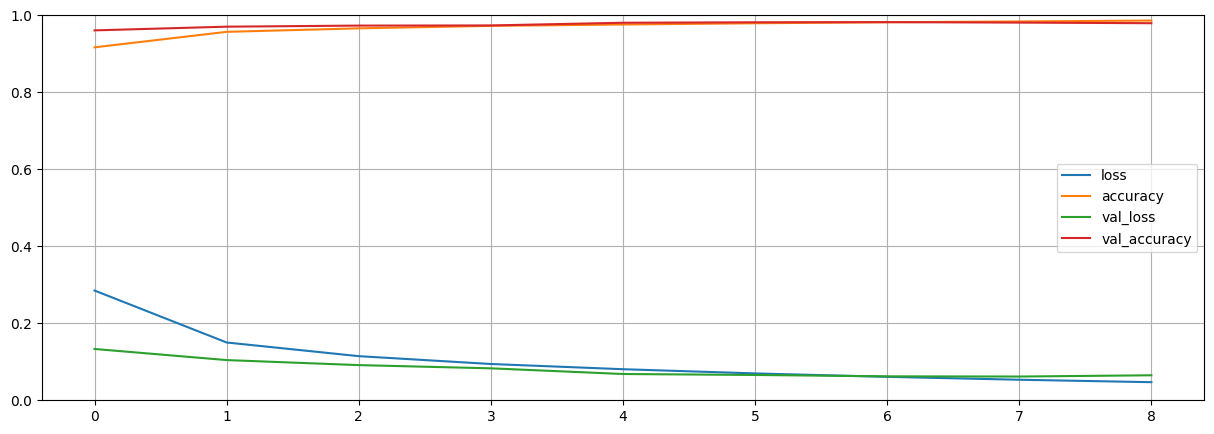

In [17]:
pd.DataFrame(history_1.history).plot(figsize=(15,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Model_2 with regularizers L1 & L2

In [18]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=4, activation='tanh', kernel_size=(3,3), input_shape=(28,28,1), batch_size=32),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])  

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (32, 26, 26, 4)           40        
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 13, 13, 4)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (32, 676)                 0         
                                                                 
 dense_3 (Dense)             (32, 300)                 203100    
                                                                 
 batch_normalization_2 (Bat  (32, 300)                 1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (32, 100)                

In [20]:
model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics='accuracy'
)
    

In [21]:
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=early_stopping)

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 7.9669 - accuracy: 0.9025 - val_loss: 2.8348 - val_accuracy: 0.9250
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 2.1956 - accuracy: 0.9283 - val_loss: 1.5644 - val_accuracy: 0.9522
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2644 - accuracy: 0.9469 - val_loss: 1.0459 - val_accuracy: 0.9368
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7998 - accuracy: 0.9569 - val_loss: 0.6569 - val_accuracy: 0.9646
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5690 - accuracy: 0.9621 - val_loss: 0.4853 - val_accuracy: 0.9680
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4487 - accuracy: 0.9646 - val_loss: 0.4094 - val_accuracy: 0.9690
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3876 - accuracy: 0.9659 - val_loss: 0.3635 - val_ac

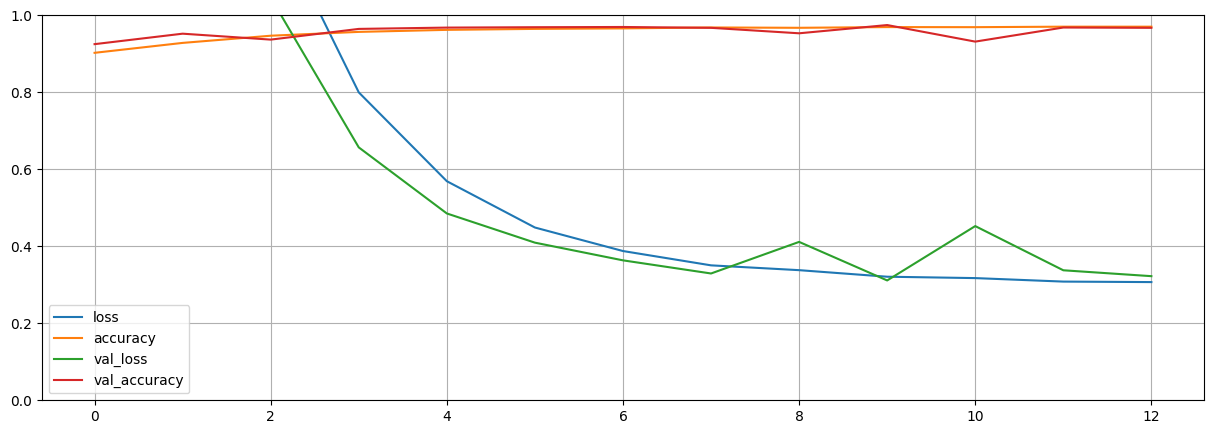

In [22]:
pd.DataFrame(history_2.history).plot(figsize=(15,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()